In [1]:
import tensorflow as tf
import matplotlib.image as img
%matplotlib inline
import numpy as np
from collections import defaultdict
import collections
from shutil import copy
from shutil import copytree, rmtree
import tensorflow.keras.backend as K
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras import regularizers
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
from tensorflow import keras
from tensorflow.keras import models
import cv2

In [2]:
!nvidia-smi

Thu Aug 18 09:01:59 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.197.02   Driver Version: 418.197.02   CUDA Version: 11.5     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  On   | 00000000:0A:00.0 Off |                    0 |
| N/A   33C    P0    43W / 300W |      0MiB / 32480MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [2]:
# Loading the best saved models to make predictions
K.clear_session()
# model_best = load_model('models/EfficientNetV2S/EfficientNetV2S.hdf5', compile=False)
model_best = load_model('models/EfficientNetV2L/EfficientNetV2L.hdf5', compile=False)

In [5]:
# Foods sorted
# data_dir = "/workspace/persistent/food-101/images" # This is for DSRI workspace path

data_dir = "/desktop/food-101/images" # This is for local path

foods_sorted = sorted(os.listdir(data_dir))


# foods_sorted = ['apple_pie','pizza','omelette']

In [6]:
len(foods_sorted)

101

In [7]:
def pick_n_random_classes(n):
  food_list = []
  random_food_indices = random.sample(range(len(foods_sorted)),n) # We are picking n random food classes
  for i in random_food_indices:
    food_list.append(foods_sorted[i])
  food_list.sort()
  return food_list

In [8]:
food_list = pick_n_random_classes(101)

In [9]:
# food_list

In [10]:
def predict_class(model, images, show = True):
  for img in images:
    img = image.load_img(img, target_size=(299, 299))
    img = image.img_to_array(img)                    
    img = np.expand_dims(img, axis=0)         
    img /= 255.                                      

    pred = model.predict(img)
    index = np.argmax(pred)
    food_list.sort()
    pred_value = food_list[index]
    if show:
        plt.imshow(img[0])                           
        plt.axis('off')
        plt.title(pred_value) 
        plt.show()

In [15]:
images = [] 
images.append('test_images/Apple.jpg')
images.append('test_images/applepie.jpg')
images.append('test_images/cupcakes.jpg')
images.append('test_images/springrolls.jpg')
images.append('test_images/samosa.jpg')


images.append('test_images/burger.jpeg')
images.append('test_images/hardburger.jpg')
images.append('test_images/dim1.jpeg')
images.append('test_images/dim2.jpeg')




In [14]:
%pwd

'/workspace/persistent/deepfood'

In [16]:
images

['test_images/Apple.jpg',
 'test_images/applepie.jpg',
 'test_images/cupcakes.jpg',
 'test_images/springrolls.jpg',
 'test_images/samosa.jpg',
 'test_images/burger.jpeg',
 'test_images/hardburger.jpg',
 'test_images/dim1.jpeg',
 'test_images/dim2.jpeg']

2022-08-18 09:04:41.387710: I tensorflow/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8300


1/1 [==============================] - 15s 15s/step


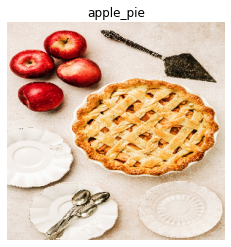

1/1 [==============================] - 0s 361ms/step


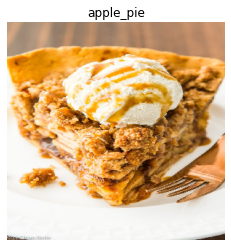

1/1 [==============================] - 0s 288ms/step


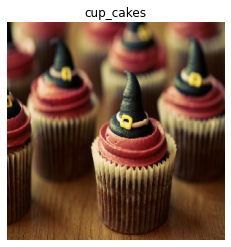

1/1 [==============================] - 0s 137ms/step


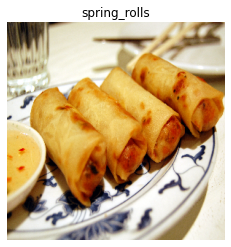

1/1 [==============================] - 0s 135ms/step


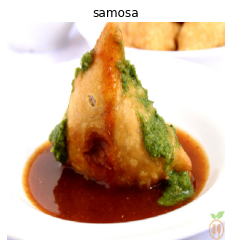

1/1 [==============================] - 0s 145ms/step


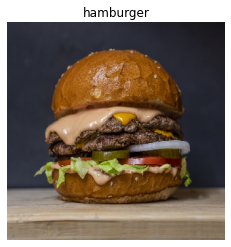

1/1 [==============================] - 0s 379ms/step


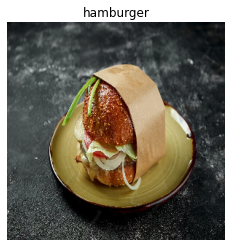

1/1 [==============================] - 0s 184ms/step


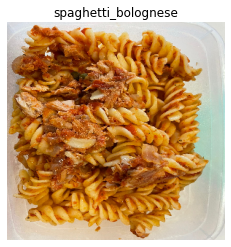

1/1 [==============================] - 0s 354ms/step


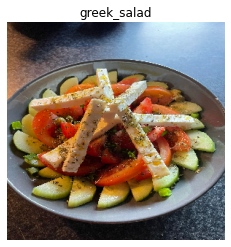

In [17]:
# show images
predict_class(model_best, images, show = True)

In [126]:
wrong = []
wrong.append('deepfood/test_images/hardburger.jpg')

1/1 [==============================] - 0s 273ms/step


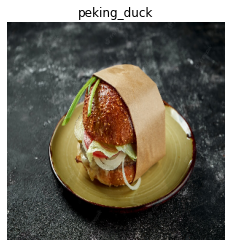

In [128]:
predict_class(model_best, wrong, show = True)

In [112]:
### Model Details

In [46]:
EfficientNetV2S = load_model('EfficientNetV2S/EfficientNetV2S.hdf5')

In [47]:
EfficientNetV2L = load_model('EfficientNetV2L/EfficientNetV2L.hdf5')

In [111]:
def print_model_details(model):
    def namestr(obj, namespace):
        return [name for name in namespace if namespace[name] is obj]
    print("==========================================================")            
    print("Model Name: ", namestr(model, globals()))
    print("Number of Layers: ", len(model.layers))
    print("Number of Parameters: ", format(model.count_params(), ',d'))
    print("==========================================================\n")

In [110]:
print_model_details(EfficientNetV2S)
print_model_details(EfficientNetV2L)

Model Name:  ['EfficientNetV2S']
Number of Layers:  516
Number of Parameters:  20,508,357

Model Name:  ['EfficientNetV2L', 'model']
Number of Layers:  1031
Number of Parameters:  117,923,845

